In [46]:
import pandas as pd 
import os 

from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset

import seaborn as sns

from datasets import load_dataset, load_from_disk
import numpy as np
import json

# Load Original DeepMath dataset

In [3]:
dataset = load_dataset("zwhe99/DeepMath-103K")['train']
deepmath_df = dataset.to_pandas()

In [25]:
def extract_topic(row):
    topic = row['topic']
    subtopics = [subtopic.strip() for subtopic in topic.split('->') if subtopic]
    return subtopics[1]

In [26]:
deepmath_df['subtopic'] = deepmath_df.apply(extract_topic, axis=1)

In [31]:
set(deepmath_df['subtopic'].explode())

{'3D Shapes',
 'Abstract Algebra',
 'Algebra',
 'Algebraic Expressions',
 'Algorithms',
 'Angles',
 'Applications of Derivatives',
 'Applications of Integrals',
 'Applied Mathematics',
 'Area',
 'Calculus',
 'Category Theory',
 'Combinations',
 'Combinatorics',
 'Complex Numbers',
 'Congruences',
 'Counting Methods',
 'Curvature',
 'Decimals',
 'Derivatives',
 'Determinants',
 'Differential Calculus',
 'Differential Equations',
 'Differential Geometry',
 'Discrete Mathematics',
 'Divisibility',
 'Equations and Inequalities',
 'Exponential Functions',
 'Factoring',
 'Factorization',
 'Field Theory',
 'Fractions',
 'Functions',
 'Geodesics',
 'Geometry',
 'Graph Theory',
 'Greatest Common Divisors (GCD)',
 'Group Theory',
 'Hyperbolic Geometry',
 'Integers',
 'Integral Calculus',
 'Integrals',
 'Intermediate Algebra',
 'Least Common Multiples (LCM)',
 'Lie Algebras',
 'Limits',
 'Linear Algebra',
 'Linear Transformations',
 'Logarithmic Functions',
 'Logic',
 'Manifolds',
 'Math Word Pro

In [ ]:
topics = ["Algebra", "Calculus", "Applied Mathematics", "Geometry", "Number Theory", "Discrete Mathematics", "Differential Equations",
          "Abstract Algebra", "Algebraic Expressions", "Algorithms", "Category Theory", "Combinatorics", "Congruences", "Differential Calculus",
          "Differential Geometry", "Field Theory", "Geodesics", "Graph Theory", "Group Theory", "Hyperbolic Geometry", "Integral Calculus",
          "Lie Algebras", "Manifolds", "Mathematical Statistics", "Non-Euclidean Geometry", "Ring Theory"
         ]

Imagine you are in the International Mathematical Olympiad (IMO) this year. You are the smartest math student. You need to solve a very difficult {topic} problem. You should very hard about this problem.

# Split DeepMath Dataset into train-test

In [48]:
dataset = load_dataset('aochongoliverli/DeepMath-103K')

In [49]:
train_df = dataset['train'].to_pandas()
test_df = dataset['test'].to_pandas()

In [51]:
train_df[train_df['difficulty']<6.0]

,question,final_answer,difficulty,topic,r1_solution_1,r1_solution_2,r1_solution_3,subtopic
0,Calculate the value of $x$ in the given circle...,\sqrt{2},1.0,Mathematics -> Geometry -> Plane Geometry -> O...,"Alright, let's see. I need to find the value o...","Okay, so I need to find the value of x in the ...","Okay, so I have this geometry problem here whe...",5
1,"Are all elements in the sequence 10, 44, 136, ...",Yes,1.0,Mathematics -> Algebra -> Prealgebra -> Integers,"Okay, so I need to check if all the numbers in...","Okay, so I need to check if all the numbers in...","Okay, so I need to check if all the numbers in...",0
2,"Given real numbers \(a, b, c, d, u_1, u_2\), d...",\dfrac{b}{d},1.0,Mathematics -> Algebra -> Prealgebra -> Simple...,"Alright, let me try to figure out this problem...","Okay, so I have this problem here that says: G...","Okay, so I need to figure out the value of \(\...",0
3,Find the equation of the line passing through ...,y = x + 1,1.0,Mathematics -> Algebra -> Prealgebra -> Simple...,"Okay, so I need to find the equation of the li...","Okay, so I need to find the equation of the li...","Okay, so I need to find the equation of the li...",0
4,What is the Shannon entropy of a riskless rand...,0,1.0,Mathematics -> Applied Mathematics -> Statisti...,"Okay, so I need to figure out the Shannon entr...","Okay, so I need to figure out the Shannon entr...","Okay, so I need to figure out the Shannon entr...",1
...,...,...,...,...,...,...,...,...
39027,"For each positive integer $n$, define a functi...",\dfrac{2}{\pi},5.5,Mathematics -> Calculus -> Integral Calculus -...,"Alright, let's tackle this problem step by ste...","Okay, so I need to find the limit as n approac...","Okay, so I need to find the limit as n approac...",2
39028,Calculate the limit: $$ \lim_{x \to \infty} \f...,16,5.5,Mathematics -> Precalculus -> Limits,"Okay, let me try to work through this limit pr...","Okay, so I need to calculate this limit: \n\n$...","Okay, so I need to calculate this limit: \n\n$...",8
39029,Find the splitting field \(E\) of the polynomi...,2,5.5,Mathematics -> Algebra -> Abstract Algebra -> ...,"Alright, let's tackle this problem: find the s...","Okay, so I need to find the splitting field E ...","Okay, so I need to find the splitting field E ...",0
39030,Find the remainder when \( P = 2008^{2007} - 2...,4032066,5.5,Mathematics -> Algebra -> Algebra -> Polynomia...,"Okay, so I need to find the remainder when P =...","Okay, so I have this problem here: Find the re...","Okay, so I need to find the remainder when P =...",0


In [52]:
39 * 3

117

In [32]:
level5 = train_df[train_df['difficulty'].between(5.0,5.5)]

In [35]:
tokenizer = AutoTokenizer.from_pretrained('aochongoliverli/Qwen2.5-1.5B-DeepMath-level1-4-14k-sft-stage0-1epoch')

In [36]:
level5['token_counts'] = level5['question'].apply(lambda x: len(tokenizer.encode(x)))

/tmp/ipykernel_3493705/1260243834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  level5['token_counts'] = level5['question'].apply(lambda x: len(tokenizer.encode(x)))


<Axes: xlabel='token_counts', ylabel='Count'>

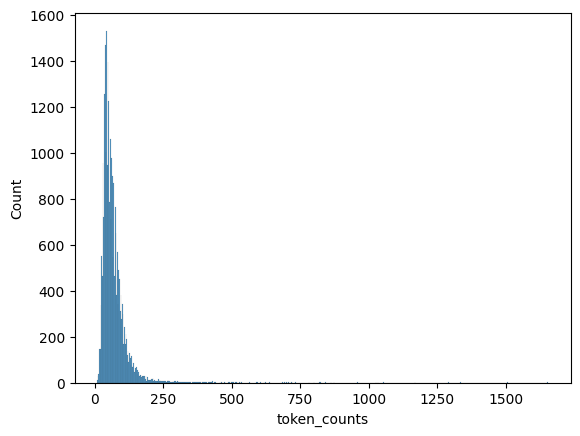

In [39]:
sns.histplot(level5['token_counts'])

# Check train data

In [54]:
cd /mnt/home/al2644/research/projects/rlvr

/mnt/home/al2644/research/projects/rlvr


In [66]:
train_dataset = pd.read_parquet('data/train/deepmath_level3-4/train.parquet')
test_dataset = pd.read_parquet('data/test/deepmath_level6-8/test.parquet')

In [67]:
test_dataset

,data_source,prompt,ability,reward_model,extra_info
0,deepmath-level6.0,[{'content': 'Find the coefficient of \(x^{15}...,math,"{'ground_truth': '4940', 'style': 'rule'}","{'difficulty': '6.0', 'index': 95, 'split': 't..."
1,deepmath-level6.0,[{'content': 'Evaluate the limit: \[ \lim_{n\t...,math,"{'ground_truth': '\dfrac{k}{12}', 'style': 'ru...","{'difficulty': '6.0', 'index': 15, 'split': 't..."
2,deepmath-level6.0,[{'content': 'Calculate the limit: \(\lim_{x\t...,math,"{'ground_truth': '0', 'style': 'rule'}","{'difficulty': '6.0', 'index': 30, 'split': 't..."
3,deepmath-level6.0,[{'content': 'Evaluate the contour integral \(...,math,"{'ground_truth': '0', 'style': 'rule'}","{'difficulty': '6.0', 'index': 158, 'split': '..."
4,deepmath-level6.0,[{'content': 'Determine the values of $a$ for ...,math,"{'ground_truth': '(-1, 0)', 'style': 'rule'}","{'difficulty': '6.0', 'index': 128, 'split': '..."
...,...,...,...,...,...
295,deepmath-level8.0,[{'content': 'Find the most general entire fun...,math,"{'ground_truth': 'f(z) = az + b', 'style': 'ru...","{'difficulty': '8.0', 'index': 594, 'split': '..."
296,deepmath-level8.0,[{'content': 'Let $L$ be the linear subspace o...,math,"{'ground_truth': 'f(x) = x(0)', 'style': 'rule'}","{'difficulty': '8.0', 'index': 559, 'split': '..."
297,deepmath-level8.0,"[{'content': 'Let \( f:[-1,1] \to \mathbb{R} \...",math,"{'ground_truth': '\dfrac{\pi}{2}', 'style': 'r...","{'difficulty': '8.0', 'index': 406, 'split': '..."
298,deepmath-level8.0,"[{'content': 'Consider the function $u(x)$, wh...",math,"{'ground_truth': '0', 'style': 'rule'}","{'difficulty': '8.0', 'index': 427, 'split': '..."
